<a href="https://colab.research.google.com/github/jimenezjos/Prueba-de-Promedios/blob/main/Prueba_Kolmogorov_Smirnov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = [
    0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
    0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
    0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
    0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
    0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
    0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
    0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
    0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
    0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
    0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
    0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
    0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
    0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
    0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
    0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
    0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
    0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
    0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
    0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
    0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]


In [5]:

def ks_test_manual(datos):
    """
    Calcula el estadístico D de Kolmogorov-Smirnov manualmente.
    """
    n = len(datos)
    datos_ordenados = np.sort(datos)
    i = np.arange(1, n + 1)

    d_mas = (i / n) - datos_ordenados
    d_menos = datos_ordenados - ((i - 1) / n)

    d_max = max(np.max(d_mas), np.max(d_menos))
    return d_max

def ks_test_scipy(datos):
    """
    Calcula el estadístico D y el valor p usando SciPy.
    """
    estadistico_d, p_valor = stats.kstest(datos, 'uniform')
    return estadistico_d, p_valor


In [6]:
if __name__ == "__main__":
    print("=== PRUEBA DE KOLMOGOROV-SMIRNOV ===")

    # Cálculos
    d_manual = ks_test_manual(data)
    d_scipy, p_scipy = ks_test_scipy(data)

    # Mostrar resultados
    print(f"\n[Cálculos]")
    print(f"Estadístico D (Manual): {d_manual:.5f}")
    print(f"Estadístico D (SciPy):  {d_scipy:.5f}")
    print(f"Valor p (p-value):      {p_scipy:.5f}")

    # Interpretación y conclusión
    alfa = 0.05
    print(f"\n[Conclusión con nivel de significancia alfa = {alfa}]")
    if p_scipy > alfa:
        print("Como el valor p es MAYOR que alfa, NO se rechaza la hipótesis nula.")
        print("Los datos SÍ se ajustan a una distribución uniforme U(0,1).")
    else:
        print("Como el valor p es MENOR o IGUAL a alfa, SE RECHAZA la hipótesis nula.")
        print("Los datos NO se ajustan a una distribución uniforme U(0,1).")

=== PRUEBA DE KOLMOGOROV-SMIRNOV ===

[Cálculos]
Estadístico D (Manual): 0.05642
Estadístico D (SciPy):  0.05642
Valor p (p-value):      0.88987

[Conclusión con nivel de significancia alfa = 0.05]
Como el valor p es MAYOR que alfa, NO se rechaza la hipótesis nula.
Los datos SÍ se ajustan a una distribución uniforme U(0,1).


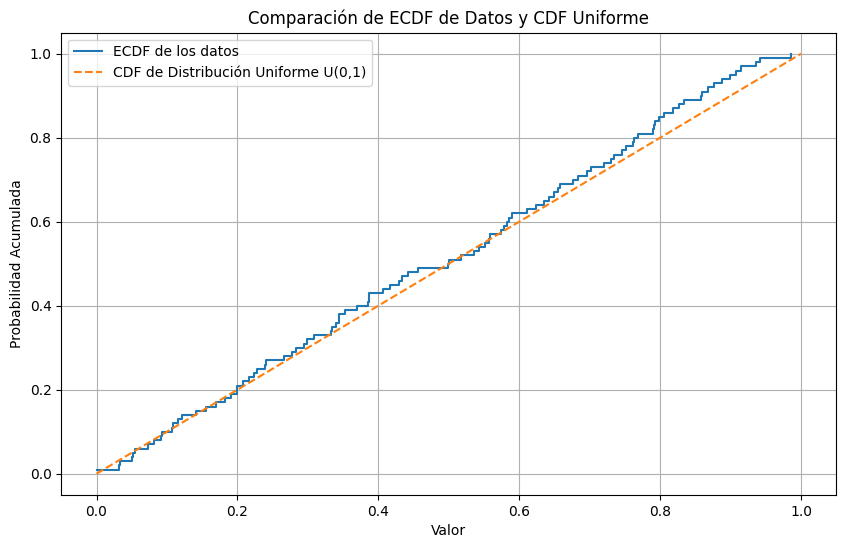

In [7]:

def ecdf(data):
    """
    Calcula la Función de Distribución Acumulada Empírica (ECDF).
    """
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

# Obtener ECDF de los datos
x_ecdf, y_ecdf = ecdf(data)

# Obtener CDF teórica de una distribución uniforme U(0,1)
x_cdf_uniform = np.linspace(0, 1, 100)
y_cdf_uniform = x_cdf_uniform

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.step(x_ecdf, y_ecdf, label='ECDF de los datos', where='post')
plt.plot(x_cdf_uniform, y_cdf_uniform, label='CDF de Distribución Uniforme U(0,1)', linestyle='--')
plt.title('Comparación de ECDF de Datos y CDF Uniforme')
plt.xlabel('Valor')
plt.ylabel('Probabilidad Acumulada')
plt.legend()
plt.grid(True)
plt.show()